In [1]:
import random
import logging

import rich

import networkx

In [2]:
from twon_lss.simulations.bcm import (
    Simulation,
    SimulationArgs,
    Ranker,
    Agent,
)

from twon_lss.schemas import Post, User, Feed, Network

In [3]:
logging.getLogger().setLevel(logging.DEBUG)

In [4]:
NUM_AGENTS: int = 3
NUM_NEIGHBORS: int = 2

ARGS = SimulationArgs(num_steps=2, num_posts_to_interact_with=1)

In [5]:
RANKER = Ranker()
rich.print(RANKER)

Ranker(
    args=RankerArgs(weights=RankerInterfaceWeights(network=1.0, individual=1.0), noise=Noise(low=0.8, high=1.2)),
    type='random'
)

In [6]:
USERS = [User() for _ in range(NUM_AGENTS)]
rich.print(USERS)

[
    User(id=UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431'), posts=Feed(root=[])),
    User(id=UserID(root='user-ae0a3c6d-763a-4bc8-b079-0edfe6538481'), posts=Feed(root=[])),
    User(id=UserID(root='user-aadbf0c2-2d93-43de-b559-b850ca7f2e09'), posts=Feed(root=[]))
]

DEBUG:root:[(UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431'), <dict_keyiterator object at 0x7490856c7060>), (UserID(root='user-ae0a3c6d-763a-4bc8-b079-0edfe6538481'), <dict_keyiterator object at 0x7490856c7100>), (UserID(root='user-aadbf0c2-2d93-43de-b559-b850ca7f2e09'), <dict_keyiterator object at 0x7490856c7150>)]


{UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431'): <dict_keyiterator at 0x7490856c7060>,
 UserID(root='user-ae0a3c6d-763a-4bc8-b079-0edfe6538481'): <dict_keyiterator at 0x7490856c7100>,
 UserID(root='user-aadbf0c2-2d93-43de-b559-b850ca7f2e09'): <dict_keyiterator at 0x7490856c7150>}

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ubuntu/repositories/TWON-LSS/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ubuntu/repositories/TWON-LSS/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ubuntu/repositories/TWON-LSS/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable

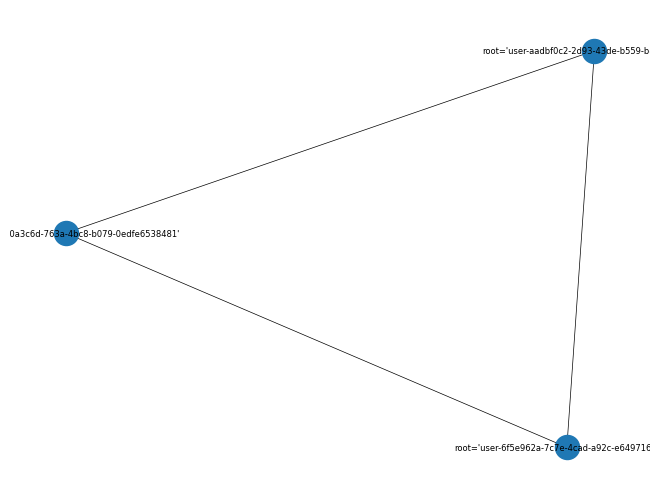

In [7]:
NETWORK = (
    Network(networkx.random_regular_graph(NUM_NEIGHBORS, len(USERS)))
    .relabel([user.id for user in USERS])
)

networkx.draw(NETWORK.root, with_labels=True, width=0.5, font_size=6)
NETWORK.neighbors

In [8]:
FEED = Feed(
    [
        Post(user=user.id, content=str(random.uniform(-1.0, 1.0)))
        for user in USERS
    ]
)
rich.print(FEED[:3])

[
    Post(
        user=UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431'),
        content='0.3787331992957528',
        reads=[],
        likes=[],
        id=PostID(root='post-e6afbdab-56ea-48e3-892c-2fdb89f8b2a6'),
        timestamp=0
    ),
    Post(
        user=UserID(root='user-ae0a3c6d-763a-4bc8-b079-0edfe6538481'),
        content='0.4497149644111418',
        reads=[],
        likes=[],
        id=PostID(root='post-0a3baad0-0e61-4d68-81f1-9d9bbd50a1f5'),
        timestamp=0
    ),
    Post(
        user=UserID(root='user-aadbf0c2-2d93-43de-b559-b850ca7f2e09'),
        content='0.9915117376639269',
        reads=[],
        likes=[],
        id=PostID(root='post-146d091d-1095-40b1-a876-d695eec80b6d'),
        timestamp=0
    )
]

In [9]:
INDIVIDUALS = {
    user: Agent(
        memory=[float(post.content)],
        eps=2.0,
        delta=0.1,
    )
    for user, post in zip(
        USERS, FEED.root, strict=False
    )
}
rich.print(INDIVIDUALS)

{
    User(id=UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431'), posts=Feed(root=[])): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.3787331992957528]
    ),
    User(id=UserID(root='user-ae0a3c6d-763a-4bc8-b079-0edfe6538481'), posts=Feed(root=[])): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.4497149644111418]
    ),
    User(id=UserID(root='user-aadbf0c2-2d93-43de-b559-b850ca7f2e09'), posts=Feed(root=[])): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.9915117376639269]
    )
}

In [10]:
simulation = Simulation(
    args=ARGS,
    ranker=RANKER,
    individuals=INDIVIDUALS,
    network=NETWORK,
    feed=FEED,
)

DEBUG:root:>f init simulation


In [11]:
simulation()

Output()

DEBUG:root:>f simulate step n=0
DEBUG:root:id=UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431') posts=Feed(root=[])
DEBUG:root:id=UserID(root='user-ae0a3c6d-763a-4bc8-b079-0edfe6538481') posts=Feed(root=[])
DEBUG:root:id=UserID(root='user-aadbf0c2-2d93-43de-b559-b850ca7f2e09') posts=Feed(root=[])
DEBUG:root:>i number of feed items 3
DEBUG:root:>i number of feed items 2 for user root='user-6f5e962a-7c7e-4cad-a92c-e64971619431'
DEBUG:root:>i number of feed items 2 for user root='user-ae0a3c6d-763a-4bc8-b079-0edfe6538481'
DEBUG:root:>i number of feed items 2 for user root='user-aadbf0c2-2d93-43de-b559-b850ca7f2e09'
DEBUG:root:>f simulate step n=1
DEBUG:root:id=UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431') posts=Feed(root=[Post(user=UserID(root='user-6f5e962a-7c7e-4cad-a92c-e64971619431'), content='0.44001105313257016', reads=[], likes=[], id=PostID(root='post-7bf30afe-7e6d-4189-8c0f-ade9d106b4e2'), timestamp=0)])
DEBUG:root:id=UserID(root='user-ae0a3c6d-763a-4bc8-b079-0e

TypeError: Object of type UserID is not JSON serializable